#Author: Elaine Gorom
#Description: Practicing tkinter for Project ideas

In [25]:
import tkinter as tk
import tkinter.messagebox
import numpy as np
import matplotlib.pyplot as plt

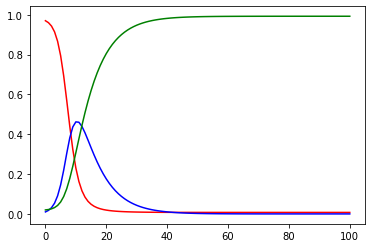

In [29]:
class SIR_GUI:
    def __init__(self):

        #create the main window
        self.main_window=tk.Tk()
        self.main_window.geometry("800x800")

        def values():
            i_str=iinitial.get()
            i0=float(i_str)
            s_str=sinitial.get()
            s0=float(s_str)
            r0=1-i0-s0
            beta_str=b.get()
            beta=float(beta_str)
            gamma_str=g.get()
            gamma=float(gamma_str)
            n=100
            dt=0.5

            def dsdt(t,s,i):
                return(-beta*s*i)

            #create function for infected ode
            def didt(t,s,i):
                return(beta*s*i-gamma*i)
        
            def RK4SIR(n,beta, gamma,s0,i0,r0,dt):
                #initialize the arrays for solutions
                S=[s0]+[0]*n
                I=[i0]+[0]*n
                R=[r0]+[0]*n
            
                #calculate each step using RK4
                for i in range(0,n):
                    Si=S[i]
                    Ii=I[i]
                

                    sk1=dsdt(i,Si,Ii)
                    ik1=didt(i,Si,Ii)
        

                    sk2=dsdt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
                    ik2=didt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

                    sk3=dsdt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
                    ik3=didt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

                    sk4=dsdt(i+dt,Si+dt*sk3,Ii+dt*ik3)
                    ik4=didt(i+dt,Si+dt*sk3,Ii+dt*ik3)

                    S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
                    I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

                #caculate recovered array
                for i in range(len(R)):
                    R[i]=1-I[i]-S[i]

                return S,I,R
            s,i,r=RK4SIR(n,beta,gamma,s0,i0,r0,dt)

            fig=plt.figure
            t=list(range(0,n+1))
            plt.plot(t,s,'r')
            plt.plot(t,i,'b')
            plt.plot(t,r,'g')
            plt.show
            return
        #create function to grab scale values
        b=tk.StringVar()
        g=tk.StringVar()
        sinitial=tk.StringVar()
        iinitial=tk.StringVar()
        
        #create frames to group widgets
        self.beta_frame=tk.Frame()
        self.gamma_frame=tk.Frame()
        self.S_frame=tk.Frame()
        self.I_frame=tk.Frame()
        self.button_frame=tk.Frame()

        #create slider for beta frame
        self.beta_label=tk.Label(self.beta_frame, text='beta')
        self.beta_slider=tk.Scale(self.beta_frame, from_=0,to=2, resolution=0.1,orient=tk.HORIZONTAL, variable=b)
        #pack the beta frame 
        self.beta_label.pack(side='left')
        self.beta_slider.pack(side='left')

        #create slider for gamma frame
        self.gamma_label=tk.Label(self.gamma_frame, text='gamma')
        self.gamma_slider=tk.Scale(self.gamma_frame, from_=0, to=1, resolution=0.1, orient=tk.HORIZONTAL, variable=g)
        #pack the gamma frame 
        self.gamma_label.pack(side='left')
        self.gamma_slider.pack(side='left')

        #create slide for S0 frame
        self.S_label=tk.Label(self.S_frame, text='S0')
        self.S_slider=tk.Scale(self.S_frame, from_=0, to=1, resolution=0.01, orient=tk.HORIZONTAL, variable=sinitial)
        #pack the mu frame
        self.S_label.pack(side='left')
        self.S_slider.pack(side='left')

         #create slide for I0 frame
        self.I_label=tk.Label(self.I_frame, text='I0')
        self.I_slider=tk.Scale(self.I_frame, from_=0, to=1, resolution=0.01, orient=tk.HORIZONTAL, variable=iinitial)
        #pack the mu frame
        self.I_label.pack(side='left')
        self.I_slider.pack(side='left')

        
        #create button widgets for the bottom frame
        self.calc_button=tk.Button(self.button_frame, text='Calculate', command=lambda: [values()])
        self.quit_button=tk.Button(self.button_frame, text='Quit', command=self.main_window.destroy)
        #pack the bottom frame buttons
        self.calc_button.pack(side='left')
        self.quit_button.pack(side='left')


        #pack the frames
        self.beta_frame.pack(side='top')
        self.gamma_frame.pack(side='top')
        self.S_frame.pack(side='top')
        self.I_frame.pack(side='top')
        self.button_frame.pack(side='top')


        #enter the main loop
        tk.mainloop()

    

    

    
    
my_gui=SIR_GUI()
